In [1]:
import praw
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from datetime import timedelta

In [12]:
# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# List of subreddits to target
subreddits = ['politics', 'election2024', 'PoliticalDiscussion', 'conservative', 'democrats', 'republicans']

# Set up an empty list to store the data
posts_data = []

# Function to convert timestamp
def get_date(created):
    return datetime.datetime.fromtimestamp(created)

# Define a search query related to US elections
query = 'US election'

# Collect posts from multiple subreddits
for subreddit in subreddits:
    subreddit_instance = reddit.subreddit(subreddit)
    
    # Fetch posts using the search query
    for submission in subreddit_instance.search(query, limit=None):
        if len(posts_data) >= 1000:  # Stop once we've collected 1000 records
            break
        posts_data.append([submission.title, submission.score, submission.id, 
                           submission.url, submission.num_comments, submission.selftext, 
                           get_date(submission.created), subreddit])

# Convert list into a DataFrame
posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'ID', 'URL', 
                                             'Num_Comments', 'Body', 'Created', 'Subreddit'])

# Drop duplicates if any
posts_df.drop_duplicates(subset=['ID'], inplace=True)

# Ensure we have 1000 records
if len(posts_df) < 1000:
    print(f"Warning: Only {len(posts_df)} posts were collected. Try adjusting the search query or adding more subreddits.")
else:
    print(f"Successfully collected {len(posts_df)} posts.")

# Save the data to a CSV file
posts_df.to_csv('reddit_us_election_data.csv', index=False)

print(posts_df.head())

                                               Title  Score       ID  \
0  Kamala Harris will win US election, Telegraph ...   8711  1f84g7u   
1  Trump not entitled to immunity for efforts to ...  40205  1fv5526   
2  Discussion Thread: First US Presidential Gener...  12313  1dq5s2f   
3  Trump moans that Zelenskyy wants Harris to win...   6291  1foaviq   
4  Discussion Thread: First US Presidential Gener...   3449  1dq932e   

                                                 URL  Num_Comments  \
0  https://www.telegraph.co.uk/us/politics/2024/0...           990   
1  https://www.france24.com/en/americas/20241003-...          1160   
2  https://www.reddit.com/r/politics/comments/1dq...         53168   
3  https://www.politico.eu/article/us-election-do...           604   
4  https://www.reddit.com/r/politics/comments/1dq...         16464   

                                                Body             Created  \
0                                                    2024-09-03 12:34:

In [16]:
# Load the dataset
posts_df = pd.read_csv('reddit_us_election_data.csv')

# Convert 'Created' to datetime (without 'unit' argument)
posts_df['Created'] = pd.to_datetime(posts_df['Created'])

# Show the first few rows to verify
print(posts_df.head())

# Basic info about the dataset
print(posts_df.info())
print(posts_df.describe())

# Now you can proceed with the rest of the EDA and visualizations

                                               Title  Score       ID  \
0  Kamala Harris will win US election, Telegraph ...   8711  1f84g7u   
1  Trump not entitled to immunity for efforts to ...  40205  1fv5526   
2  Discussion Thread: First US Presidential Gener...  12313  1dq5s2f   
3  Trump moans that Zelenskyy wants Harris to win...   6291  1foaviq   
4  Discussion Thread: First US Presidential Gener...   3449  1dq932e   

                                                 URL  Num_Comments  \
0  https://www.telegraph.co.uk/us/politics/2024/0...           990   
1  https://www.france24.com/en/americas/20241003-...          1160   
2  https://www.reddit.com/r/politics/comments/1dq...         53168   
3  https://www.politico.eu/article/us-election-do...           604   
4  https://www.reddit.com/r/politics/comments/1dq...         16464   

                                                Body             Created  \
0                                                NaN 2024-09-03 12:34:

In [8]:
# Load the dataset
posts_df = pd.read_csv('reddit_us_election_data.csv')

# Convert 'Created' to datetime (without 'unit' argument)
posts_df['Created'] = pd.to_datetime(posts_df['Created'])

# Show the first few rows to verify
print(posts_df.head())

# Now you can proceed with the rest of the EDA and visualizations

                                               Title  Score       ID  \
0  Kamala Harris will win US election, Telegraph ...   8749  1f84g7u   
1  Trump not entitled to immunity for efforts to ...  40230  1fv5526   
2  /r/Politics' 2024 US Elections Live Thread, Pa...   5203  1gkm4g5   
3  /r/Politics' 2024 US Elections Live Thread, Pa...   4900  1gkpa96   
4  Why isn't Election Day a national holiday in t...   9175  1gk94vn   

                                                 URL  Num_Comments Body  \
0  https://www.telegraph.co.uk/us/politics/2024/0...          1031  NaN   
1  https://www.france24.com/en/americas/20241003-...          1145  NaN   
2         https://www.reddit.com/live/1db9knzhqzdfp/         60400  NaN   
3         https://www.reddit.com/live/1db9knzhqzdfp/         83312  NaN   
4  https://www.kgw.com/article/news/nation-world/...           782  NaN   

              Created Subreddit  
0 2024-09-03 12:34:06  politics  
1 2024-10-03 07:09:39  politics  
2 2024-11-05 1

In [13]:
print(posts_df.shape)

(953, 8)


In [10]:
# Basic info about the dataset
print(posts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         953 non-null    object        
 1   Score         953 non-null    int64         
 2   ID            953 non-null    object        
 3   URL           953 non-null    object        
 4   Num_Comments  953 non-null    int64         
 5   Body          342 non-null    object        
 6   Created       953 non-null    datetime64[ns]
 7   Subreddit     953 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 59.7+ KB
None


In [11]:
print(posts_df.describe())

               Score  Num_Comments                        Created
count     953.000000    953.000000                            953
mean     3101.034627   1432.207765  2022-03-25 20:14:38.525708544
min         0.000000      0.000000            2012-08-06 02:06:51
25%        27.000000      8.000000            2020-10-27 14:30:09
50%       175.000000    107.000000            2022-10-21 12:21:12
75%      1021.000000    574.000000            2024-08-05 09:48:21
max    214318.000000  83312.000000            2024-11-06 09:12:16
std     11623.839666   5866.347133                            NaN


               Score  Num_Comments
count     930.000000    930.000000
mean     3598.111828   1234.016129
std     12484.633775   4850.753206
min         0.000000      0.000000
25%        26.000000      8.000000
50%       188.000000    112.500000
75%      1441.000000    518.500000
max    214316.000000  81425.000000


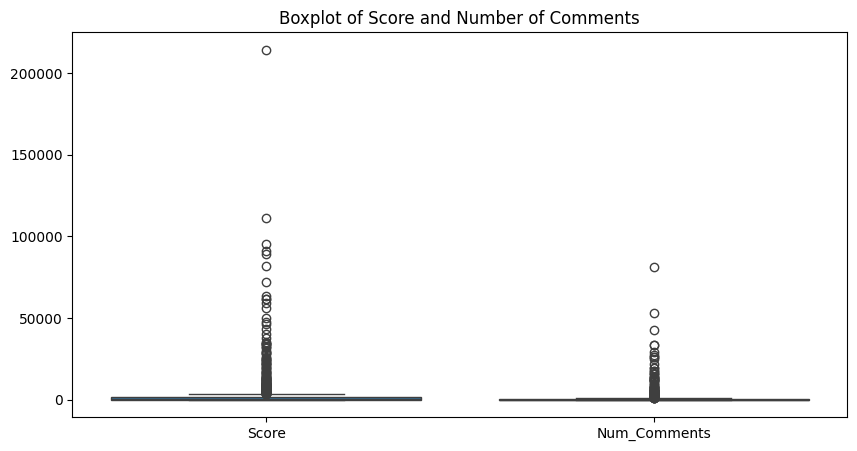

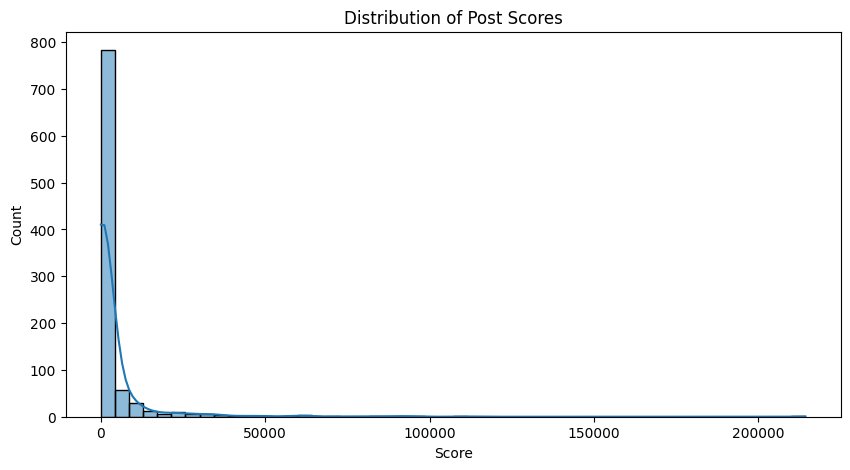

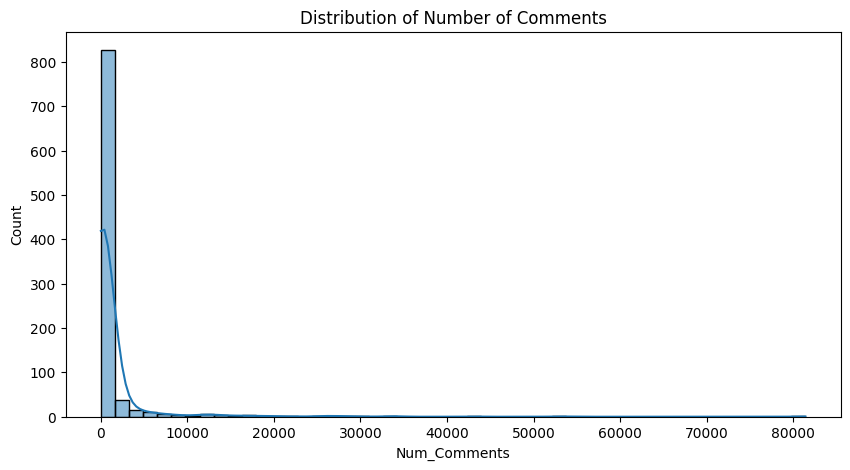

In [6]:
# Summary statistics of numerical columns
print(posts_df[['Score', 'Num_Comments']].describe())

# Checking for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=posts_df[['Score', 'Num_Comments']])
plt.title('Boxplot of Score and Number of Comments')
plt.show()

# Checking distribution of post scores
plt.figure(figsize=(10,5))
sns.histplot(posts_df['Score'], bins=50, kde=True)
plt.title('Distribution of Post Scores')
plt.show()

# Checking distribution of number of comments
plt.figure(figsize=(10,5))
sns.histplot(posts_df['Num_Comments'], bins=50, kde=True)
plt.title('Distribution of Number of Comments')
plt.show()

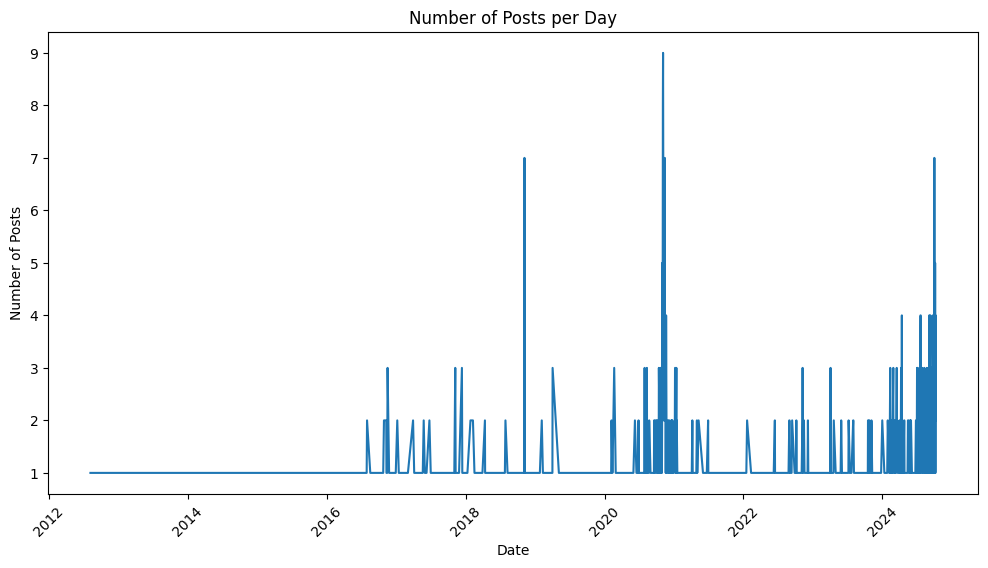

In [7]:
# Grouping posts by day
posts_df['Date'] = posts_df['Created'].dt.date
posts_per_day = posts_df.groupby('Date').size()

# Plotting number of posts over time
plt.figure(figsize=(12,6))
posts_per_day.plot()
plt.title('Number of Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

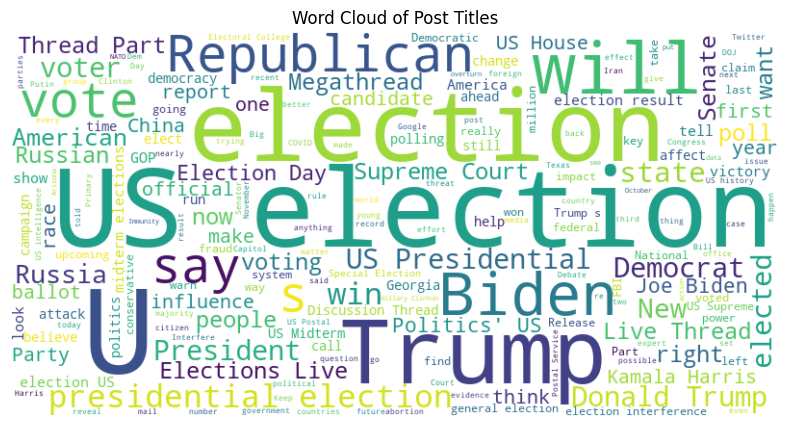

In [8]:
# Combine all titles into one string
title_text = ' '.join(posts_df['Title'].values)

# Generate a word cloud for the titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

# Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Titles')
plt.show()

In [10]:
# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize text
def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Tokenize and remove punctuation
        tokens = text.lower().split()
        tokens = [word.strip(string.punctuation) for word in tokens]
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []  # Return an empty list if the text is not a string

# Apply the function to the 'Body' column
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Combine all words in post bodies for further analysis
all_words = [word for tokens in posts_df['cleaned_body'] for word in tokens]

# Print some results to verify
print(posts_df[['Body', 'cleaned_body']].head())

                                                Body  \
0                                                NaN   
1                                                NaN   
2  Tonight's debate will begin at 9 p.m. Eastern....   
3                                                NaN   
4  Hi folks, Reddit has encountered some errors t...   

                                        cleaned_body  
0                                                 []  
1                                                 []  
2  [tonight's, debate, begin, 9, p.m, eastern, mo...  
3                                                 []  
4  [hi, folks, reddit, encountered, errors, tonig...  


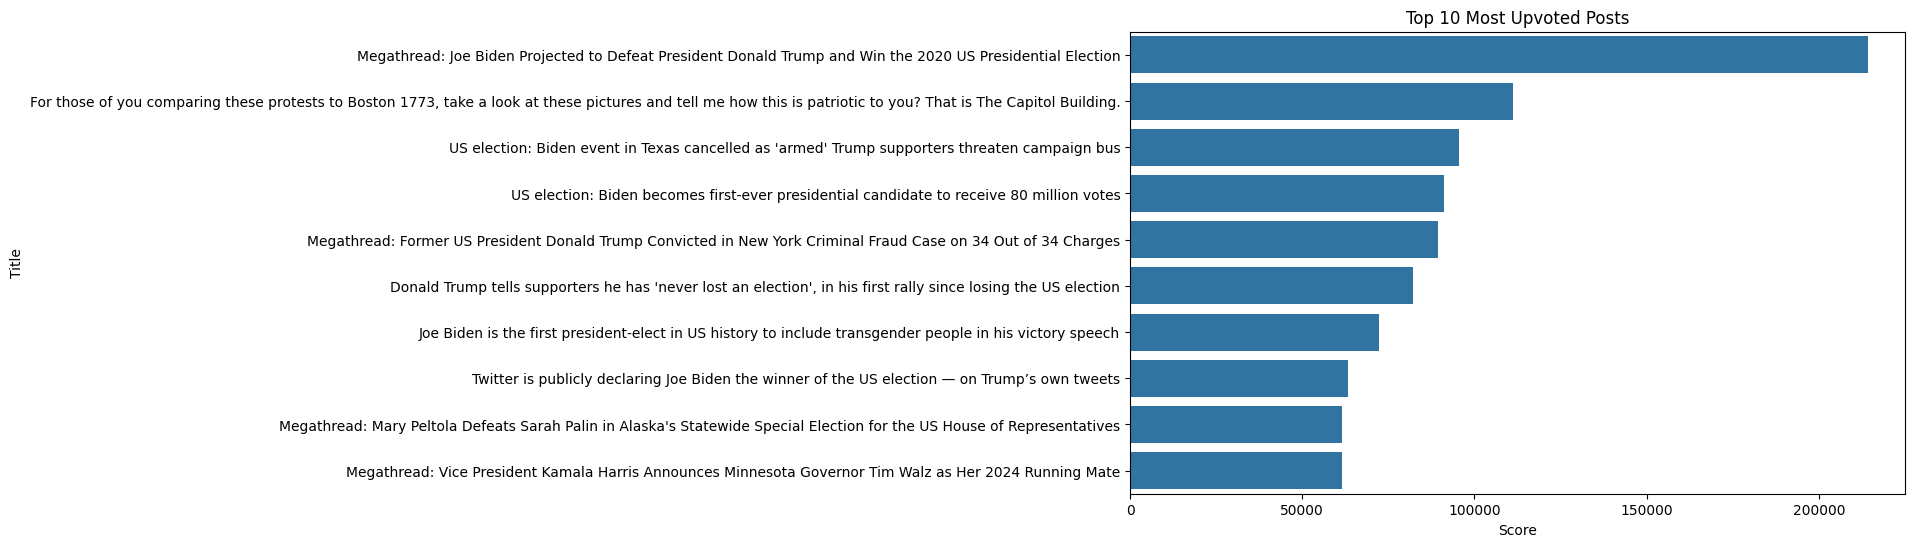

In [11]:
# Top 10 most upvoted posts
top_upvoted_posts = posts_df.nlargest(10, 'Score')

# Plotting top 10 most upvoted posts
plt.figure(figsize=(10,6))
sns.barplot(x='Score', y='Title', data=top_upvoted_posts)
plt.title('Top 10 Most Upvoted Posts')
plt.show()

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...


True

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


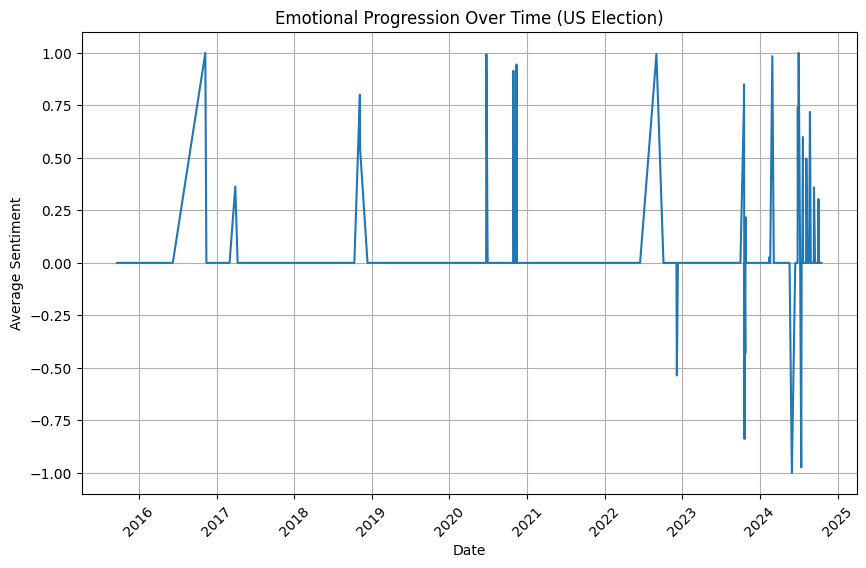

In [3]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# Define the subreddit to scrape data from
subreddit = reddit.subreddit('politics')

# Set up an empty list to store the data
posts_data = []

# Define a search query related to US elections
query = 'US election'

# Fetch posts from Reddit using the search query
for submission in subreddit.search(query, limit=1000):
    posts_data.append([submission.title, submission.score, submission.id, 
                       submission.url, submission.num_comments, submission.selftext, 
                       submission.created])

# Create a DataFrame to structure the data
posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'ID', 'URL', 
                                             'Num_Comments', 'Body', 'Created'])

# Remove null values from the DataFrame
posts_df.dropna(inplace=True)

# Convert the 'Created' timestamp to datetime format
posts_df['Created'] = pd.to_datetime(posts_df['Created'], unit='s')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize text
def clean_text(text):
    if isinstance(text, str):
        tokens = text.lower().split()
        tokens = [word.strip(string.punctuation) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# Apply the function to the 'Body' column
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Neutral if there's no text

# Apply the sentiment analysis to each post
posts_df['Sentiment'] = posts_df['Body'].apply(get_sentiment)

# Resample sentiment by day and calculate average sentiment for each day
posts_df.set_index('Created', inplace=True)
daily_sentiment = posts_df['Sentiment'].resample('D').mean()

# Plot emotional progression over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_sentiment.index, y=daily_sentiment.values)
plt.title('Emotional Progression Over Time (US Election)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


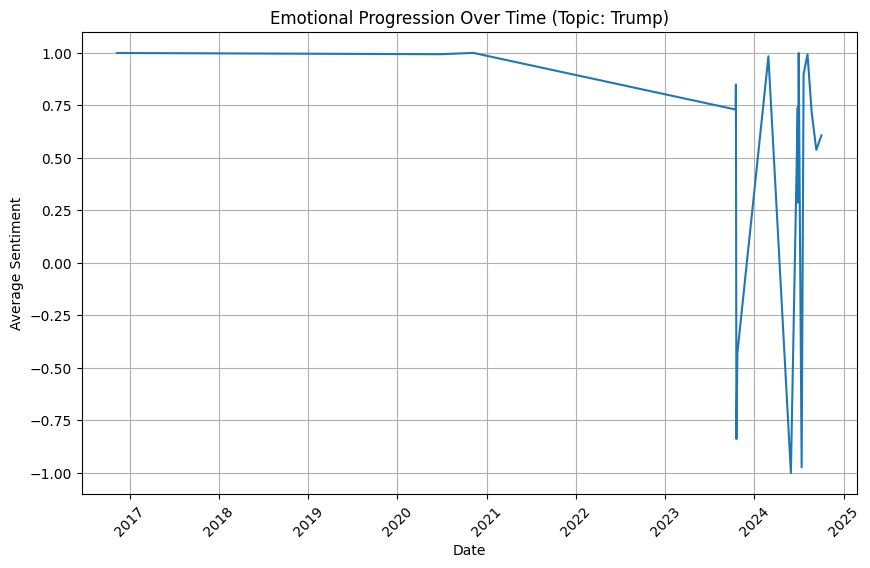

In [4]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# Define the subreddit to scrape data from
subreddit = reddit.subreddit('politics')

# Set up an empty list to store the data
posts_data = []

# Define a search query related to US elections
query = 'US election'

# Fetch posts from Reddit using the search query
for submission in subreddit.search(query, limit=1000):
    posts_data.append([submission.title, submission.score, submission.id, 
                       submission.url, submission.num_comments, submission.selftext, 
                       submission.created])

# Create a DataFrame to structure the data
posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'ID', 'URL', 
                                             'Num_Comments', 'Body', 'Created'])

# Remove null values from the DataFrame
posts_df.dropna(inplace=True)

# Convert the 'Created' timestamp to datetime format
posts_df['Created'] = pd.to_datetime(posts_df['Created'], unit='s')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize text
def clean_text(text):
    if isinstance(text, str):
        tokens = text.lower().split()
        tokens = [word.strip(string.punctuation) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# Apply the function to the 'Body' column
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Neutral if there's no text

# Apply the sentiment analysis to each post
posts_df['Sentiment'] = posts_df['Body'].apply(get_sentiment)

# Filter posts related to a single topic, e.g., 'Trump'
single_topic_df = posts_df[posts_df['Body'].str.contains('Trump', case=False, na=False)]

# Resample sentiment by day and calculate average sentiment for each day
single_topic_df.set_index('Created', inplace=True)
daily_sentiment_topic = single_topic_df['Sentiment'].resample('D').mean()

# Plot emotional progression over time for the specific topic
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_sentiment_topic.index, y=daily_sentiment_topic.values)
plt.title('Emotional Progression Over Time (Topic: Trump)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


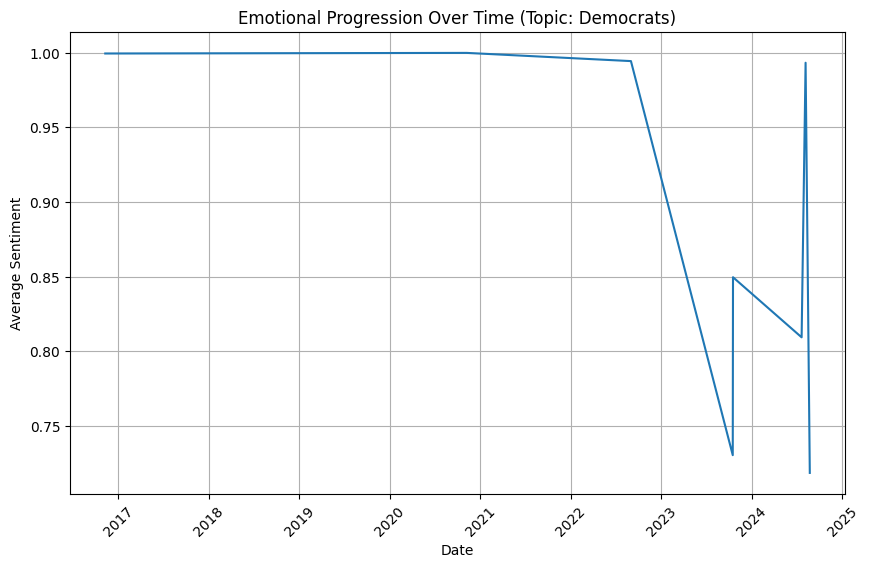

In [28]:
# Download the VADER lexicon
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# Define the subreddit to scrape data from
subreddit = reddit.subreddit('politics')

# Set up an empty list to store the data
posts_data = []

# Define a search query related to US elections
query = 'US election'

# Fetch posts from Reddit using the search query
for submission in subreddit.search(query, limit=1000):
    posts_data.append([submission.title, submission.score, submission.id, 
                       submission.url, submission.num_comments, submission.selftext, 
                       submission.created])

# Create a DataFrame to structure the data
posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'ID', 'URL', 
                                             'Num_Comments', 'Body', 'Created'])

# Remove null values from the DataFrame
posts_df.dropna(inplace=True)

# Convert the 'Created' timestamp to datetime format
posts_df['Created'] = pd.to_datetime(posts_df['Created'], unit='s')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize text
def clean_text(text):
    if isinstance(text, str):
        tokens = text.lower().split()
        tokens = [word.strip(string.punctuation) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# Apply the function to the 'Body' column
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Neutral if there's no text

# Apply the sentiment analysis to each post
posts_df['Sentiment'] = posts_df['Body'].apply(get_sentiment)

# Filter posts related to a single topic, e.g., 'Democrats'
single_topic_df = posts_df[posts_df['Body'].str.contains('Democrat|Democrats', case=False, na=False)]

# Resample sentiment by day and calculate average sentiment for each day
single_topic_df.set_index('Created', inplace=True)
daily_sentiment_topic = single_topic_df['Sentiment'].resample('D').mean()

# Plot emotional progression over time for the specific topic
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_sentiment_topic.index, y=daily_sentiment_topic.values)
plt.title('Emotional Progression Over Time (Topic: Democrats)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


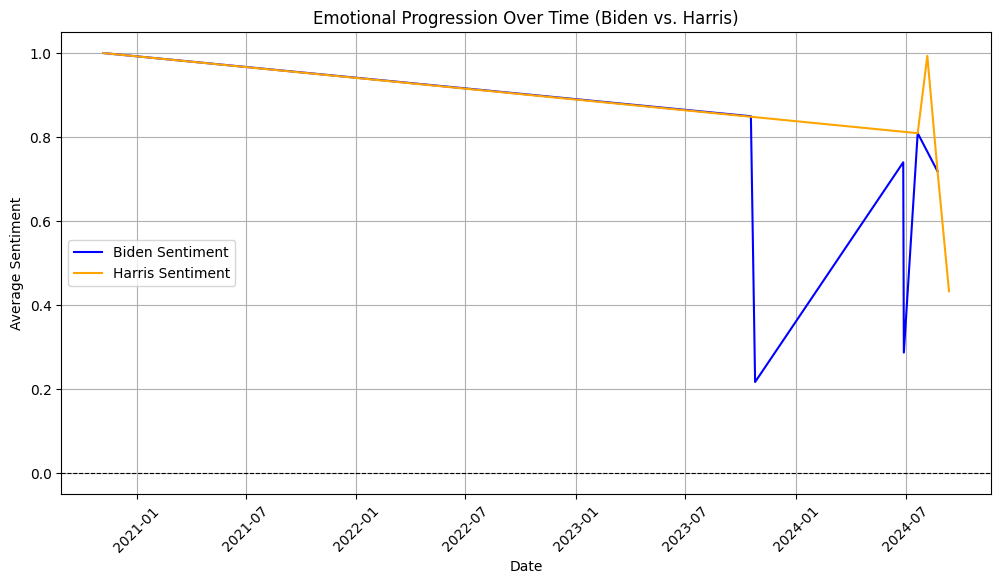

In [31]:
# Download the VADER lexicon and stopwords
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# Define the subreddit to scrape data from
subreddit = reddit.subreddit('politics')

# Set up an empty list to store the data
posts_data = []

# Define a search query related to US elections
query = 'US election'

# Fetch posts from Reddit using the search query
for submission in subreddit.search(query, limit=1000):
    posts_data.append([submission.title, submission.score, submission.id, 
                       submission.url, submission.num_comments, submission.selftext, 
                       submission.created])

# Create a DataFrame to structure the data
posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'ID', 'URL', 
                                             'Num_Comments', 'Body', 'Created'])

# Remove null values from the DataFrame
posts_df.dropna(inplace=True)

# Convert the 'Created' timestamp to datetime format
posts_df['Created'] = pd.to_datetime(posts_df['Created'], unit='s')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize text
def clean_text(text):
    if isinstance(text, str):
        tokens = text.lower().split()
        tokens = [word.strip(string.punctuation) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# Apply the function to the 'Body' column
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Neutral if there's no text

# Apply the sentiment analysis to each post
posts_df['Sentiment'] = posts_df['Body'].apply(get_sentiment)

# Filter posts related to 'Biden'
biden_df = posts_df[posts_df['Body'].str.contains('Biden', case=False, na=False)]
biden_df.set_index('Created', inplace=True)
daily_sentiment_biden = biden_df['Sentiment'].resample('D').mean()

# Filter posts related to 'Harris'
harris_df = posts_df[posts_df['Body'].str.contains('Harris', case=False, na=False)]
harris_df.set_index('Created', inplace=True)
daily_sentiment_harris = harris_df['Sentiment'].resample('D').mean()

# Plot emotional progression over time for Biden and Harris on a single graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sentiment_biden.index, y=daily_sentiment_biden.values, label='Biden Sentiment', color='blue')
sns.lineplot(x=daily_sentiment_harris.index, y=daily_sentiment_harris.values, label='Harris Sentiment', color='orange')

# Formatting the plot
plt.title('Emotional Progression Over Time (Biden vs. Harris)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.axhline(0, color='black', lw=0.8, ls='--')  # Add a horizontal line at y=0 for reference
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


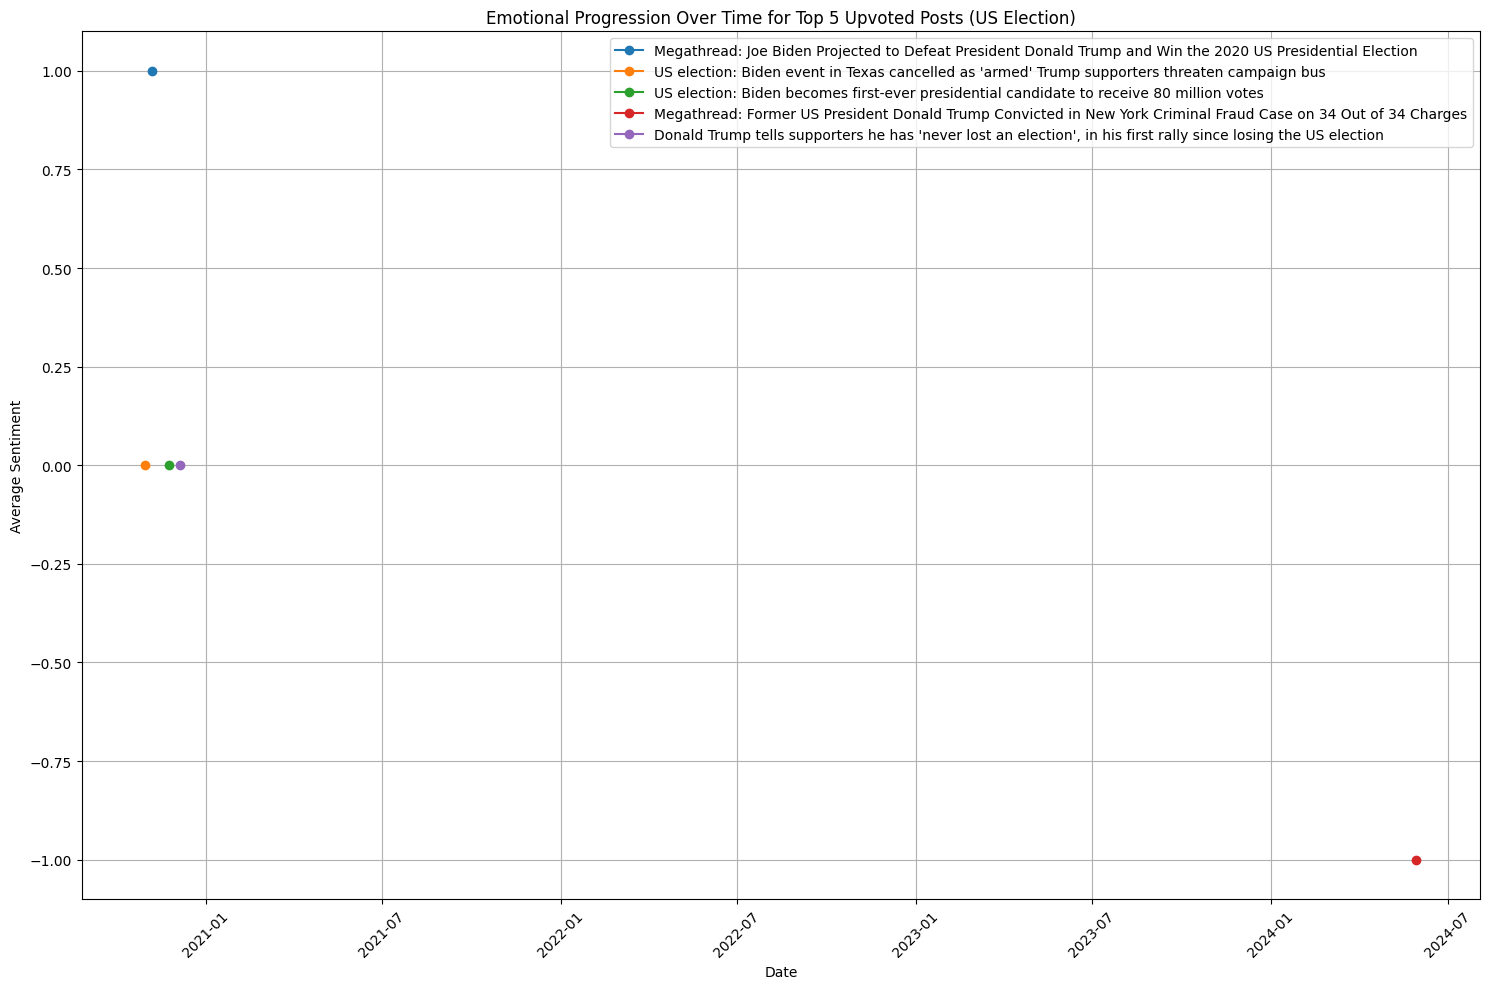

In [9]:
# Download the VADER lexicon if not already done
nltk.download('vader_lexicon')

# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# Define the subreddit to scrape data from
subreddit = reddit.subreddit('politics')

# Set up an empty list to store the data
posts_data = []

# Define a search query related to US elections
query = 'US election'

# Fetch posts from Reddit using the search query
for submission in subreddit.search(query, limit=1000):
    posts_data.append([submission.title, submission.score, submission.id, 
                       submission.url, submission.num_comments, submission.selftext, 
                       submission.created])

# Create a DataFrame to structure the data
posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'ID', 'URL', 
                                             'Num_Comments', 'Body', 'Created'])

# Remove null values from the DataFrame
posts_df.dropna(inplace=True)

# Convert the 'Created' timestamp to datetime format
posts_df['Created'] = pd.to_datetime(posts_df['Created'], unit='s')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize text
def clean_text(text):
    if isinstance(text, str):
        tokens = text.lower().split()
        tokens = [word.strip(string.punctuation) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# Apply the function to the 'Body' column
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Neutral if there's no text

# Apply the sentiment analysis to each post
posts_df['Sentiment'] = posts_df['Body'].apply(get_sentiment)

# Get the top 5 upvoted posts
top_5_posts = posts_df.nlargest(5, 'Score')

# Prepare a plot
plt.figure(figsize=(15, 10))

# Loop through each top post and plot its sentiment progression
for index, row in top_5_posts.iterrows():
    post_title = row['Title']
    
    # Resample sentiment by day and calculate average sentiment for each post
    daily_sentiment = posts_df[posts_df['ID'] == row['ID']].set_index('Created')['Sentiment'].resample('D').mean()

    # Plotting
    plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', label=post_title)

# Customize the plot
plt.title('Emotional Progression Over Time for Top 5 Upvoted Posts (US Election)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Top 10 Upvoted Posts:
Title: Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election, Score: 214315
Title: US election: Biden event in Texas cancelled as 'armed' Trump supporters threaten campaign bus, Score: 95497
Title: US election: Biden becomes first-ever presidential candidate to receive 80 million votes, Score: 91286
Title: Megathread: Former US President Donald Trump Convicted in New York Criminal Fraud Case on 34 Out of 34 Charges, Score: 89517
Title: Donald Trump tells supporters he has 'never lost an election', in his first rally since losing the US election, Score: 82086
Title: Joe Biden is the first president-elect in US history to include transgender people in his victory speech, Score: 72341
Title: Twitter is publicly declaring Joe Biden the winner of the US election — on Trump’s own tweets, Score: 63391
Title: Megathread: Mary Peltola Defeats Sarah Palin in Alaska's Statewide Special Election for the US House of Represen

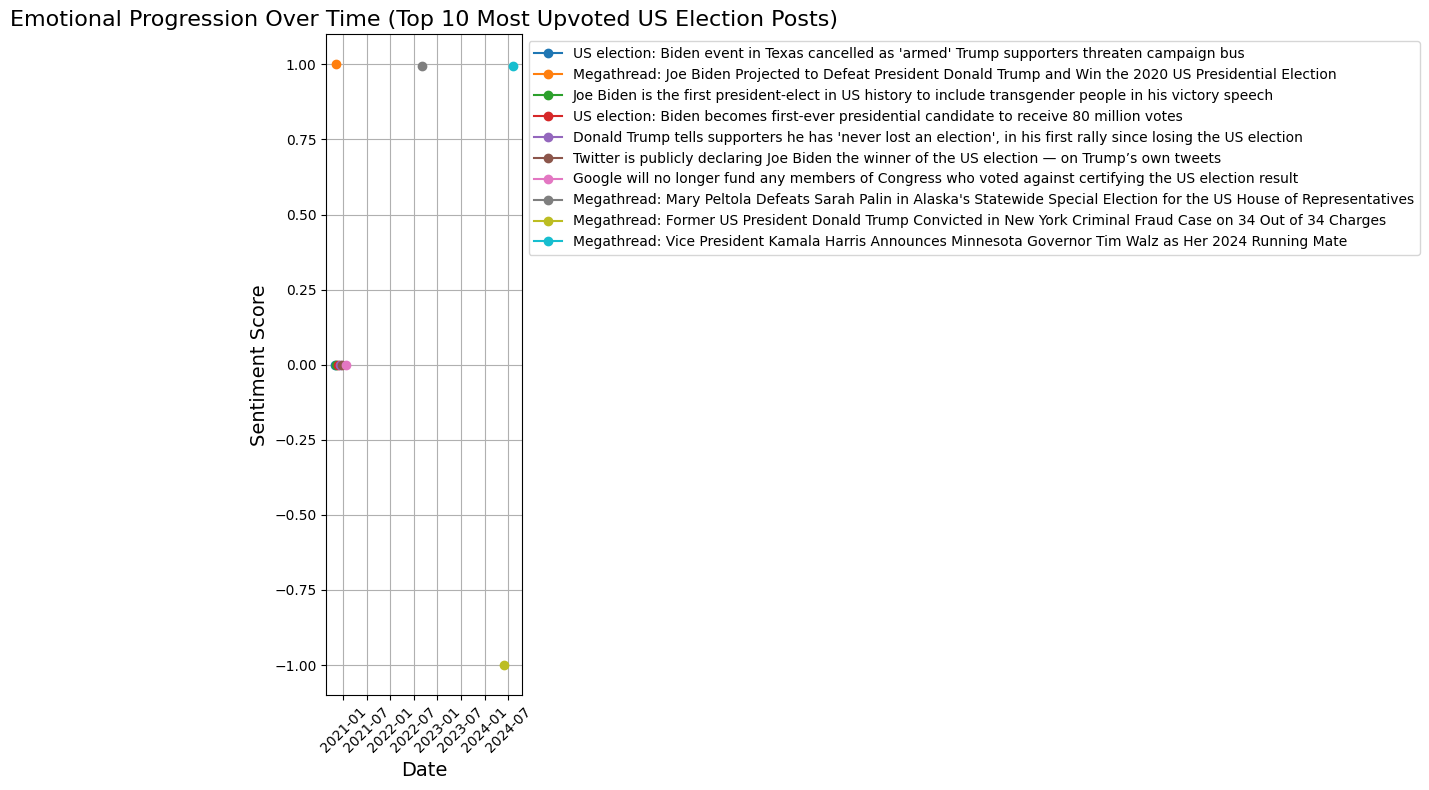

In [11]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# Define the subreddit to scrape data from
subreddit = reddit.subreddit('politics')

# Set up an empty list to store the data
posts_data = []

# Define a search query related to US elections
query = 'US election'

# Fetch posts from Reddit using the search query
for submission in subreddit.search(query, limit=1000):
    posts_data.append([submission.title, submission.score, submission.id, 
                       submission.url, submission.num_comments, submission.selftext, 
                       submission.created])

# Create a DataFrame to structure the data
posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'ID', 'URL', 
                                             'Num_Comments', 'Body', 'Created'])

# Remove null values from the DataFrame
posts_df.dropna(inplace=True)

# Convert the 'Created' timestamp to datetime format
posts_df['Created'] = pd.to_datetime(posts_df['Created'], unit='s')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize text
def clean_text(text):
    if isinstance(text, str):
        tokens = text.lower().split()
        tokens = [word.strip(string.punctuation) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# Apply the function to the 'Body' column
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Neutral if there's no text

# Apply the sentiment analysis to each post
posts_df['Sentiment'] = posts_df['Body'].apply(get_sentiment)

# Filter the Top 10 most upvoted posts
top_10_posts = posts_df.nlargest(10, 'Score')

# Display the titles of the top 10 upvoted posts
print("Top 10 Upvoted Posts:")
for index, row in top_10_posts.iterrows():
    print(f"Title: {row['Title']}, Score: {row['Score']}")

# Set index to 'Created' timestamp for plotting
top_10_posts.set_index('Created', inplace=True)

# Sort posts by date (if needed)
top_10_posts = top_10_posts.sort_index()

# Plot emotional progression over time for the top 10 most upvoted posts
plt.figure(figsize=(12, 8))

# Loop through each of the top 10 posts
for index, row in top_10_posts.iterrows():
    plt.plot([index], [row['Sentiment']], marker='o', label=row['Title'])

# Customizing the plot
plt.title('Emotional Progression Over Time (Top 10 Most Upvoted US Election Posts)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Adding a legend to identify each post
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Version 7.7.1 of praw is outdated. Version 7.8.1 was released Friday October 25, 2024.


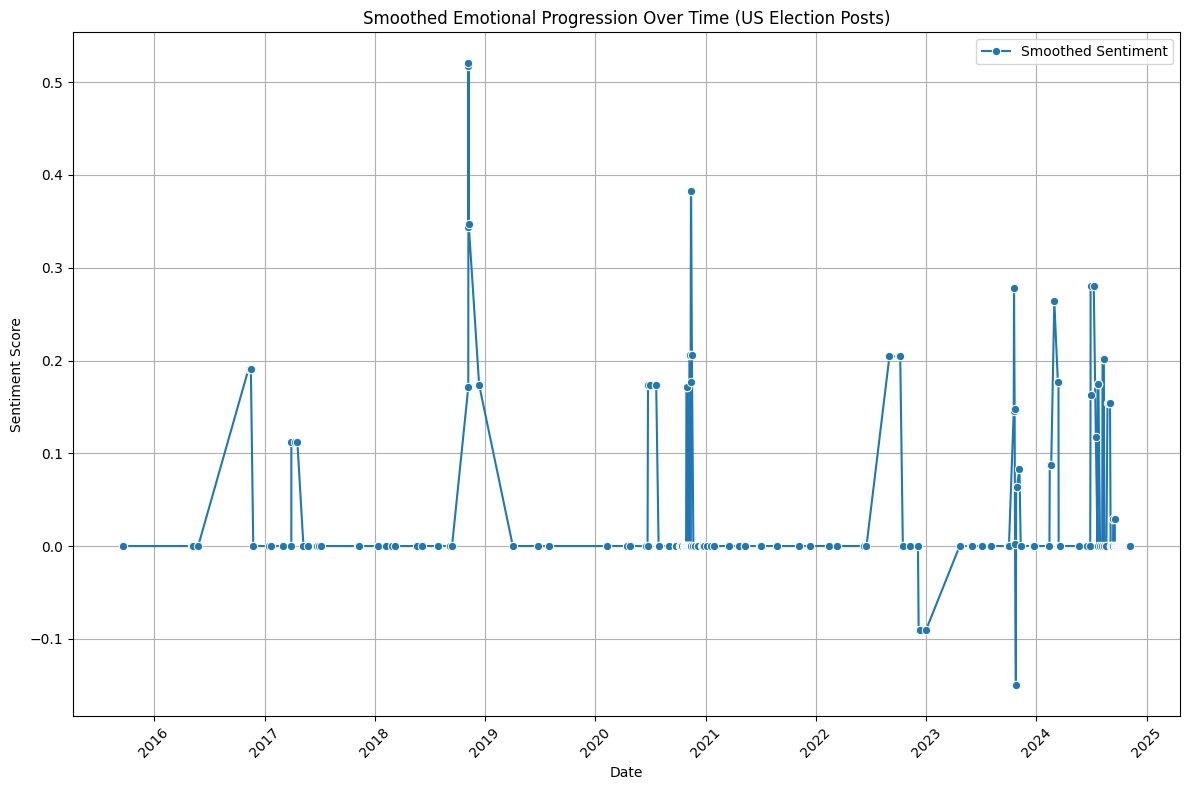

In [1]:
# Download necessary resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Define your functions
def clean_text(text):
    tokens = text.lower().split()
    tokens = [word.strip(string.punctuation) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def hybrid_sentiment(text):
    # VADER
    vader_score = sid.polarity_scores(text)['compound']
    # TextBlob
    textblob_score = TextBlob(text).sentiment.polarity
    # Hybrid score
    return (vader_score + textblob_score) / 2

def moving_average(data, window=3):
    return data.rolling(window=window, min_periods=1).mean()

# Reddit API setup
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')
subreddit = reddit.subreddit('politics')
query = 'US election'

# Fetch Reddit posts
posts_data = []
for submission in subreddit.search(query, limit=500):  # Reduced limit for demonstration
    posts_data.append([submission.title, submission.score, submission.selftext, submission.created])

posts_df = pd.DataFrame(posts_data, columns=['Title', 'Score', 'Body', 'Created'])
posts_df.dropna(inplace=True)
posts_df['Created'] = pd.to_datetime(posts_df['Created'], unit='s')

# Preprocessing
stop_words = set(stopwords.words('english'))
posts_df['cleaned_body'] = posts_df['Body'].apply(clean_text)

# Initialize VADER and apply hybrid sentiment
sid = SentimentIntensityAnalyzer()
posts_df['Sentiment'] = posts_df['cleaned_body'].apply(hybrid_sentiment)

# Apply moving average for smoothing
posts_df.set_index('Created', inplace=True)
posts_df.sort_index(inplace=True)
posts_df['Smoothed_Sentiment'] = moving_average(posts_df['Sentiment'])

# Plotting the sentiment progression
plt.figure(figsize=(12, 8))
sns.lineplot(data=posts_df['Smoothed_Sentiment'], marker='o', label='Smoothed Sentiment')
plt.title('Smoothed Emotional Progression Over Time (US Election Posts)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
train_df, test_df = train_test_split(posts_df, test_size=0.2, random_state=42)  # 80% train, 20% test

In [39]:
print(test_df.columns)

Index(['text', 'label'], dtype='object')


In [40]:
# Assuming test_df is already created with the correct structure

# Define your sentiment analysis function (example)
def get_sentiment(text):
    # Placeholder for sentiment analysis logic
    if 'love' in text:
        return 'POSITIVE'
    elif 'hate' in text:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Apply the function to the 'text' column
test_df['Predicted_Sentiment'] = test_df['text'].apply(get_sentiment)

# Display the updated DataFrame
print(test_df)

                                                    text  label  \
0      I love sci-fi and am willing to put up with a ...      0   
1      Worth the entertainment value of a rental, esp...      0   
2      its a totally average film with a few semi-alr...      0   
3      STAR RATING: ***** Saturday Night **** Friday ...      0   
4      First off let me say, If you haven't enjoyed a...      0   
...                                                  ...    ...   
24995  Just got around to seeing Monster Man yesterda...      1   
24996  I got this as part of a competition prize. I w...      1   
24997  I got Monster Man in a box set of three films ...      1   
24998  Five minutes in, i started to feel how naff th...      1   
24999  I caught this movie on the Sci-Fi channel rece...      1   

      Predicted_Sentiment  
0                POSITIVE  
1                 NEUTRAL  
2                 NEUTRAL  
3                 NEUTRAL  
4                 NEUTRAL  
...                   ...  

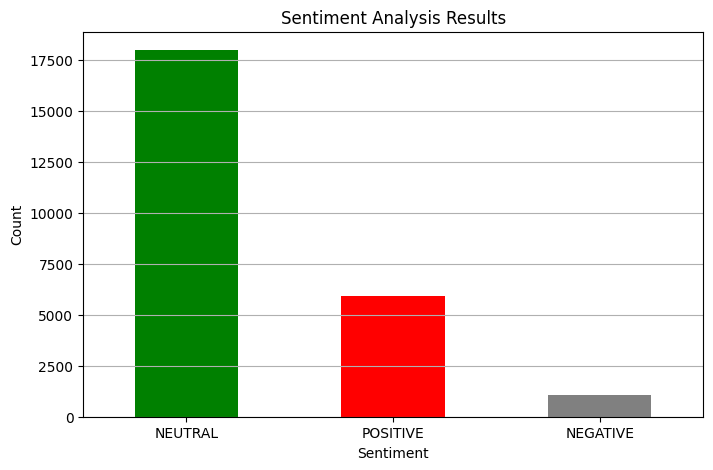

In [41]:
# Count the occurrences of each sentiment
sentiment_counts = test_df['Predicted_Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [44]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'POSITIVE'
    elif score <= -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Apply categorization to the 'Sentiment' column
posts_df['Categorized_Sentiment'] = posts_df['Sentiment'].apply(categorize_sentiment)

In [47]:
# Filter posts related to Democrats and Republicans
democrat_posts = posts_df[posts_df['Body'].str.contains('Biden|Harris', case=False, na=False)]
republican_posts = posts_df[posts_df['Body'].str.contains('Trump|Republican', case=False, na=False)]

# Count sentiments for Democrats
democrat_counts = democrat_posts['Categorized_Sentiment'].value_counts()
democrat_counts = democrat_counts.reindex(['POSITIVE', 'NEGATIVE', 'NEUTRAL']).fillna(0)

# Count sentiments for Republicans
republican_counts = republican_posts['Categorized_Sentiment'].value_counts()
republican_counts = republican_counts.reindex(['POSITIVE', 'NEGATIVE', 'NEUTRAL']).fillna(0)

In [48]:
# Create a DataFrame for visualization with total counts
visualization_df = pd.DataFrame({
    'Democrats': democrat_counts,
    'Republicans': republican_counts
}).T  # Transpose to have parties as rows

# Adding total posts analyzed
total_democrat_posts = len(democrat_posts)
total_republican_posts = len(republican_posts)

visualization_df['Total Posts'] = [total_democrat_posts, total_republican_posts]

# Show the DataFrame
print(visualization_df)

Categorized_Sentiment  POSITIVE  NEGATIVE  NEUTRAL  Total Posts
Democrats                   9.0       0.0      0.0            9
Republicans                15.0       2.0      0.0           17


<Figure size 1200x700 with 0 Axes>

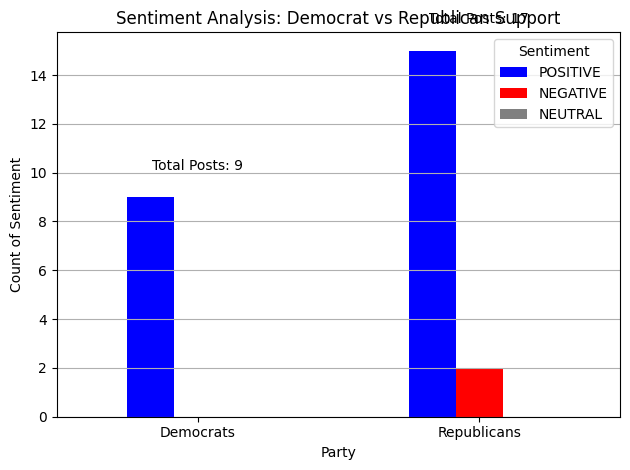

In [49]:
# Plotting
plt.figure(figsize=(12, 7))
visualization_df.iloc[:, :-1].plot(kind='bar', color=['blue', 'red', 'gray'])
plt.title('Sentiment Analysis: Democrat vs Republican Support')
plt.xlabel('Party')
plt.ylabel('Count of Sentiment')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Annotate total posts above the bars
for index, value in enumerate(visualization_df['Total Posts']):
    plt.text(index, max(visualization_df.iloc[index, :-1]) + 1, f'Total Posts: {value}', 
             ha='center', va='bottom', fontsize=10)

plt.legend(title='Sentiment')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [50]:
# Count posts related to Democrats and Republicans
democrat_interest_count = posts_df[posts_df['Body'].str.contains('Biden|Harris', case=False, na=False)].shape[0]
republican_interest_count = posts_df[posts_df['Body'].str.contains('Trump|Republican', case=False, na=False)].shape[0]

# Create a DataFrame to hold the interest counts
interest_df = pd.DataFrame({
    'Party': ['Democrats', 'Republicans'],
    'Interest Count': [democrat_interest_count, republican_interest_count]
})

# Display the interest DataFrame
print(interest_df)

         Party  Interest Count
0    Democrats               9
1  Republicans              17


C:\Users\sudhe\AppData\Local\Temp\ipykernel_22952\3940793961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Interest Count', data=interest_df, palette='viridis')


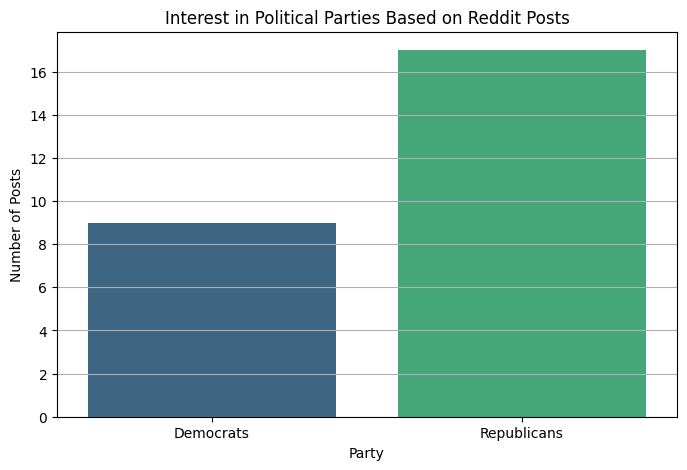

In [51]:
# Plotting the interest in each party
plt.figure(figsize=(8, 5))
sns.barplot(x='Party', y='Interest Count', data=interest_df, palette='viridis')
plt.title('Interest in Political Parties Based on Reddit Posts')
plt.xlabel('Party')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()